In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "prop/vary_signa_L_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [4]:
oper_char_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,1.000000,0.942577,1.394262,RRT,1.0
1,0.857143,14.946629,1.140945,Tree-Values,1.0
2,0.833333,15.075333,1.373854,UV(0.05),1.0
3,1.000000,2.615015,4.741372,RRT,2.0
4,0.714286,31.267314,5.301360,Tree-Values,2.0
...,...,...,...,...,...
595,1.000000,61.140213,27.480107,Tree-Values,5.0
596,0.833333,75.376663,26.828455,UV(0.05),5.0
597,1.000000,26.012626,107.452592,RRT,10.0
598,1.000000,141.642479,115.774773,Tree-Values,10.0


In [5]:
oper_char_df.index = range(oper_char_df.shape[0])

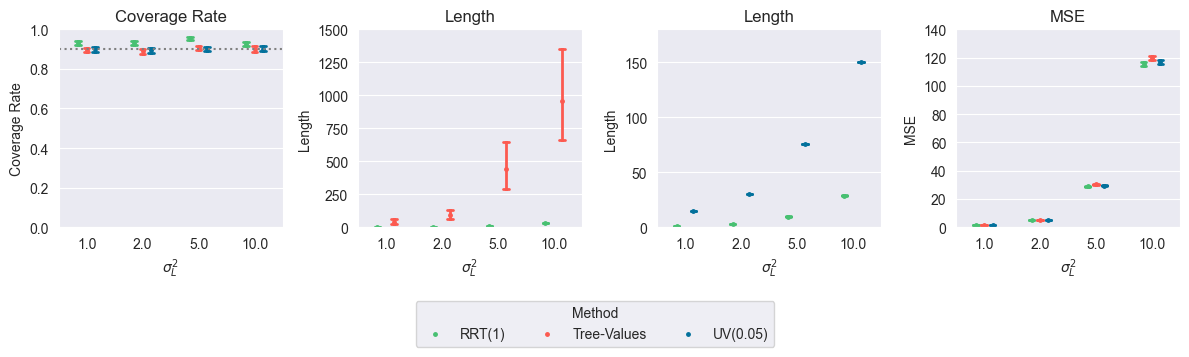

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=False)

oper_char_df['Method'] = oper_char_df['Method'].replace('RRT', 'RRT(1)')

my_palette = {"RRT(1)": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.05)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    oper_char_df_i = oper_char_df.copy()
    if i == 1:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "UV(0.05)"]
    elif i == 2:
        oper_char_df_i = oper_char_df[oper_char_df['Method'] != "Tree-Values"]
    sns.pointplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df_i, ax=axes[i],
                  dodge=0.3, linestyle='none', markersize=1.5,
                  err_kws={'linewidth': 2}, capsize=0.1, palette=my_palette)
    axes[i].set_title(f'{metric}')
    axes[i].set_xlabel(r'$\sigma_L^2$')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif i == 1:
        axes[i].set_ylim(0,1500)
    elif i == 2:
        axes[i].set_ylim(0,180)
    elif metric == "MSE":
        axes[i].set_ylim(0,140)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=3)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [11]:
means = oper_char_df.groupby(["SD(Y)", 'Method'])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,SD(Y),Method,Coverage Rate,Length,MSE
0,1.0,RRT(1),0.928971,0.998437,1.393173
1,1.0,Tree-Values,0.895500,37.021656,1.168872
2,1.0,UV(0.05),0.898829,15.075333,1.345720
3,2.0,RRT(1),0.929771,2.491193,4.819492
4,2.0,Tree-Values,0.889274,91.142492,4.832596
5,2.0,UV(0.05),0.893743,30.150665,4.827318
6,5.0,RRT(1),0.954414,9.657939,28.875871
7,5.0,Tree-Values,0.905945,439.269164,30.414058
8,5.0,UV(0.05),0.900252,75.376663,29.422888
9,10.0,RRT(1),0.926538,28.645550,115.183919


In [8]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [9]:
oper_char_df[tree_flag].groupby(['SD(Y)'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,SD(Y),proportion_infinity
0,1.0,0.0
1,2.0,0.0
2,5.0,0.0
3,10.0,0.0


In [45]:
word = "xabc"

In [47]:
i = 3
word[0:i] + word[i+1:]

'xab'

In [1]:
from collections import defaultdict

In [12]:
a = set()
def fun(a):
    a.add("x")
fun(a)

In [13]:
a

{'x'}